In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

pd.options.display.max_columns = None

In [2]:
df = pd.read_excel('assets/Salary.xlsx')
df['group'] = df['position'].apply(lambda x: 'admin' if x =='Administration 1' or x == 'Administration 2' else 'consultant')
df.head()

,gender,age,employment,position,office,salary,group
0,F,65.831622,13.998631,Administration 1,A,87400,admin
1,F,63.477070,30.499658,Administration 1,A,79600,admin
2,M,31.052704,2.751540,Administration 1,A,79200,admin
3,F,62.179329,37.913758,Administration 1,B,77900,admin
4,F,52.971937,5.163587,Administration 1,B,75000,admin


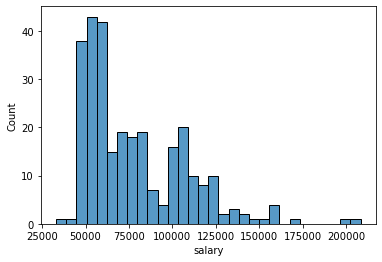

In [3]:
sns.histplot(data=df, x='salary', bins=30);

In [4]:
df.groupby('position')['salary'].agg(['size','mean', 'min', 'max'])

,size,mean,min,max
position,,,,
Administration 1,49,59032.653061,33100,87400
Administration 2,22,54877.272727,41100,62500
Consultants 1,86,57546.511628,46700,108300
Consultants 2,47,78846.808511,56700,97500
Consultants 3,53,106584.905660,81300,125000
Consultants 4,9,133077.777778,100000,156700
Consultants 5,21,138247.619048,96700,208300


In [5]:
df[(df['group']=='consultant')].groupby('gender')['salary'].agg(['size','mean', 'min', 'max'])

,size,mean,min,max
gender,,,,
F,103,82241.747573,46700,156700
M,113,87909.734513,50000,208300


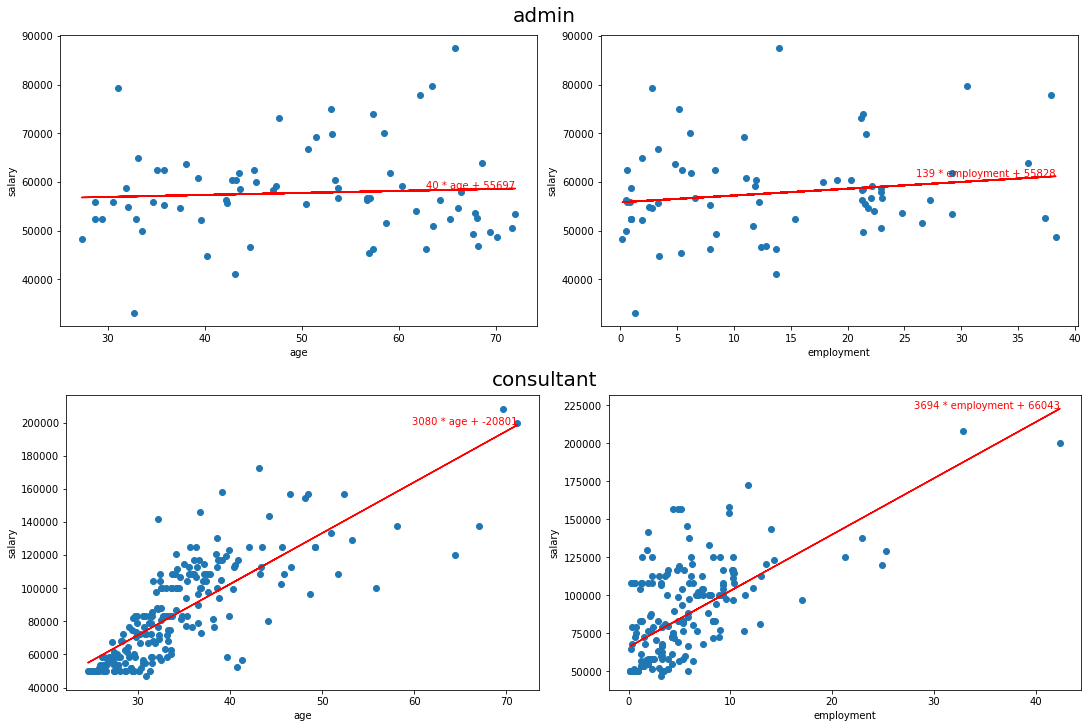

In [6]:
category = 'group'
groups = df[category].unique()
groups.sort()
target='salary'
features = ['age','employment']

fig = plt.figure(constrained_layout=True, figsize=(15, 5 * len(groups)))
#fig.suptitle(target)
subfigs = fig.subfigures(nrows=len(groups), ncols=1)
for row, subfig in enumerate(subfigs):
    group = groups[row]
    subfig.suptitle(group, fontsize=20)
    axs = subfig.subplots(nrows=1, ncols=len(features))
    for col, ax in enumerate(axs):
        feature = features[col]
        dfg = df[df[category]==group]
        X=dfg[[feature]]
        x=dfg[feature]
        y=dfg[target]

        lr = LinearRegression()
        lr.fit(X, y)
        a = lr.coef_[0]
        b = lr.intercept_
        
        ax.set_xlabel(feature)
        ax.set_ylabel(target)                
        ax.scatter(x, y)
        ax.plot(x, x*a+b, color='r')
        trend = '{} * {} + {}'.format(int(a), feature, int(b))
        ax.text(x.max(), x.max()*a+b, trend, horizontalalignment='right', color='r')